In [1]:
import numpy as np
import numpy.linalg as la # matrix rank, inverse
import scipy.io
import matplotlib.pyplot as plt # plots
from matplotlib import colors

Question 3 Fisheriris

Dot Products of Residuals with Columns of X: [3.54383189e-12 1.67599268e-12 2.67874611e-12 9.37916411e-13]


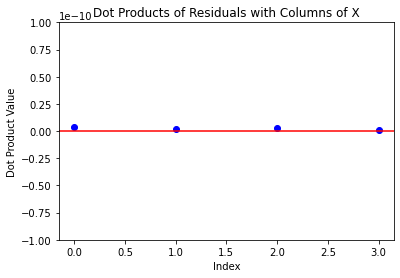

In [3]:
##### Part b #####

# load data, make sure 'fisheriris.mat‘ is in your working directory
data = scipy.io.loadmat("fisheriris.mat")
X = data['meas']
y_text = data['species']

############################
# YOUR CODE BELOW
# Process and assign numerical values to
# ‘y‘ according to your (a), make sure ‘y‘ is a 1d numpy array.
# If dimensions are mismatching, you may find ‘y = y.flatten()‘ useful.
d = dict()
y = []
n = 150
for idx in range(n):
    if str(y_text[idx][0]) not in d:
        d[str(y_text[idx][0])] = d.get(str(y_text[idx][0]), 1) - len(d)
    y.append(d.get(str(y_text[idx][0])))
y = np.array(y)

# Compute the least squares weights
w_hat = la.inv(X.T@X)@X.T@y
# Compute the residuals
y_hat = X@w_hat
r = y - y_hat
# Make a plot
dot_products = X.T@r
print(f"Dot Products of Residuals with Columns of X: {dot_products}")
# Function to format tick labels
plt.figure()
plt.scatter(np.arange(len(dot_products)), dot_products, color='blue')  # x-values are just a range of indices
plt.ylim(-1e-10, 1e-10)
plt.axhline(0, color='r')
plt.title('Dot Products of Residuals with Columns of X')
plt.xlabel('Index')
plt.ylabel('Dot Product Value')
plt.show()

In [18]:
##### Part c #####

# number of random trials
N = 10_000
# array to store errors
errs = np.zeros(N)
# size of training set
num_train = 40
for i in np.arange(N):
    # initialize 0-length arrays for the train and holdout indices. These
    # arrays will be filled in the inner loop.
    idx_train = np.zeros(0, dtype=np.intp)
    idx_holdout = np.zeros(0, dtype=np.intp)
    # There are 3 label types and 50 samples of each type
    for label_type in range(3):
        # Choose a random ordering of the 50 samples
        r = np.random.permutation(50)
        # Add the first num_train indices of the random ordering to
        # the idx_train array
        idx_train = np.concatenate((idx_train,
                                    50 * label_type + r[:num_train]))
        # Add the rest of the indices to the idx_holdout array
        idx_holdout = np.concatenate((idx_holdout,
                                   50 * label_type + r[num_train:]))
    # divide data and labels into the train and holdout sets
    Xt = X[idx_train]
    yt = y[idx_train]
    Xh = X[idx_holdout]
    yh = y[idx_holdout]
       
    ########################
    # YOUR CODE BELOW
    # Solve for the LS weights
    w_hat = la.inv(Xt.T@Xt)@Xt.T@yt
    y_hat = Xh@w_hat
    for j in range(len(y_hat)):
        if y_hat[j] > 0.5:
            y_hat[j] = 1
        elif -0.5 <= y_hat[j] <= 0.5:
            y_hat[j] = 0
        elif y_hat[j] < -0.5:
            y_hat[j] = -1
    errs[i] = np.mean(y_hat != yh)
print(f"Error estimate: {np.mean(errs)}")

Error estimate: 0.03259666666666667


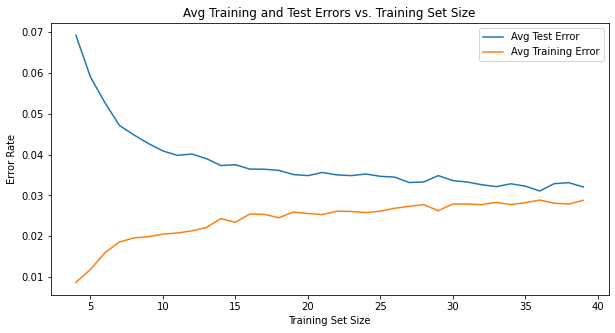

In [26]:
##### Part d #####

# number of random trials
N = 1_000
# Min / Max size of the training set
min_num_train = 4
max_num_train = 40
# Arrays to store error rates
train_errs = np.zeros((max_num_train-min_num_train, N))
test_errs = np.zeros((max_num_train-min_num_train, N))
n_train_vals = np.arange(min_num_train, max_num_train)

for j, num_train in enumerate(n_train_vals):
    for i in np.arange(N):
       # initialize 0-length arrays for the train and holdout indices.
       # These arrays will be filled in the inner loop.
       idx_train = np.zeros(0, dtype=np.intp)
       idx_holdout = np.zeros(0, dtype=np.intp)
       # There are 3 label types and 50 samples of each type
       for label_type in range(3):
           # Choose a random ordering of the 50 samples
           r = np.random.permutation(50)
           # Add the first num_train indices of the random ordering to
           # the idx_train array
           idx_train = np.concatenate((idx_train,
                                    50 * label_type + r[:num_train]))
           # Add the rest of the indices to the idx_holdout array
           idx_holdout = np.concatenate((idx_holdout,
                                    50 * label_type + r[num_train:]))
       # divide data and labels into the train and holdout sets
       Xt = X[idx_train]
       yt = y[idx_train]
       Xh = X[idx_holdout]
       yh = y[idx_holdout]

       w_hat = la.inv(Xt.T@Xt)@Xt.T@yt
       yh_hat = Xh@w_hat
       yt_hat = Xt@w_hat

       for k in range(len(yh_hat)):
        if yh_hat[k] > 0.5:
            yh_hat[k] = 1
        elif -0.5 <= yh_hat[k] <= 0.5:
            yh_hat[k] = 0
        elif yh_hat[k] < -0.5:
            yh_hat[k] = -1
        
        for h in range(len(yt_hat)):
           if yt_hat[h] > 0.5:
            yt_hat[h] = 1
           elif -0.5 <= yt_hat[h] <= 0.5:
                yt_hat[h] = 0
           elif yt_hat[h] < -0.5:
                yt_hat[h] = -1
        test_errs[j, i] = np.mean(yh_hat != yh)
        train_errs[j, i] = np.mean(yt_hat != yt)

avg_test_error = np.mean(test_errs, axis = 1)
avg_train_error = np.mean(train_errs, axis = 1)

plt.figure(figsize=(10, 5))
plt.plot(n_train_vals, avg_test_error, label='Avg Test Error')
plt.plot(n_train_vals, avg_train_error, label='Avg Training Error')
plt.xlabel('Training Set Size')
plt.ylabel('Error Rate')
plt.title('Avg Training and Test Errors vs. Training Set Size')
plt.legend()
plt.show()


At the very beginning (small training set size), a flexible model can easily fit all the data points perfectly, leading to very low training errors. On the other hand, the average testing error starts at a relatively high value but decreases rapidly as the training set size increases. This is reasonable behavior because when the training set is large, the model has more information to learn from, which leads to a better fit for the testing data.  Both training errors begins to stabilize around the training set size of 30 to 35. Therefore, the adequate number for our training set size is 30 to 35.

In [24]:
##### Part e #####

# using only the measurements sepal length and petal length.
X_subset = X[:, [0, 2]]

# Arrays to store error rates
train_errs_subset = np.zeros((max_num_train-min_num_train, N))
test_errs_subset = np.zeros((max_num_train-min_num_train, N))

for j, num_train in enumerate(n_train_vals):
    for i in np.arange(N):
       # initialize 0-length arrays for the train and holdout indices.
       # These arrays will be filled in the inner loop.
       idx_train = np.zeros(0, dtype=np.intp)
       idx_holdout = np.zeros(0, dtype=np.intp)
       # There are 3 label types and 50 samples of each type
       for label_type in range(3):
           # Choose a random ordering of the 50 samples
           r = np.random.permutation(50)
           # Add the first num_train indices of the random ordering to
           # the idx_train array
           idx_train = np.concatenate((idx_train,
                                    50 * label_type + r[:num_train]))
           # Add the rest of the indices to the idx_holdout array
           idx_holdout = np.concatenate((idx_holdout,
                                    50 * label_type + r[num_train:]))
       # divide data and labels into the train and holdout sets
       Xt_subset = X_subset[idx_train]
       yt_subset = y[idx_train]
       Xh_subset = X_subset[idx_holdout]
       yh_subset = y[idx_holdout]

       w_hat_subset = la.inv(Xt_subset.T@Xt_subset)@Xt_subset.T@yt_subset
       yh_hat_subset = Xh_subset@w_hat_subset
       yt_hat_subset = Xt_subset@w_hat_subset

       for k in range(len(yh_hat_subset)):
        if yh_hat_subset[k] > 0.5:
            yh_hat_subset[k] = 1
        elif -0.5 <= yh_hat_subset[k] <= 0.5:
            yh_hat_subset[k] = 0
        elif yh_hat_subset[k] < -0.5:
            yh_hat_subset[k] = -1
        
        for h in range(len(yt_hat_subset)):
           if yt_hat_subset[h] > 0.5:
            yt_hat_subset[h] = 1
           elif -0.5 <= yt_hat_subset[h] <= 0.5:
                yt_hat_subset[h] = 0
           elif yt_hat_subset[h] < -0.5:
                yt_hat_subset[h] = -1
        test_errs_subset[j, i] = np.mean(yh_hat_subset != yh_subset)
        train_errs_subset[j, i] = np.mean(yt_hat_subset != yt_subset)

avg_test_error_subset = np.mean(test_errs_subset, axis=1)
print(f"Error estimate: {np.mean(avg_test_error_subset)}")

Error estimate: 0.05633855478385722


The average test error when using only the measurements sepal length and petal length is approximately 0.0563, which is slightly higher than part (c).

Question 4: Subspaces and Bases <br>
Part (c)

In [22]:
##### Part c #####

### STARTER CODE
p = np.array(
    [[0.2, 0.4, 0. ],
     [0.4, 0.8, 0. ],
     [0. , 0. , 1. ]]
)

U1 = p[:, 1]
U1 = U1/la.norm(U1)
U2 = p[:, 2] - U1*(U1.T@p[:, 2])
U2 = U2/la.norm(U2)

(U1, U2)

(array([0.4472136 , 0.89442719, 0.        ]), array([0., 0., 1.]))